In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [55]:
data = pd.read_csv('data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
data.dropna(inplace=True) #drop null values

In [58]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

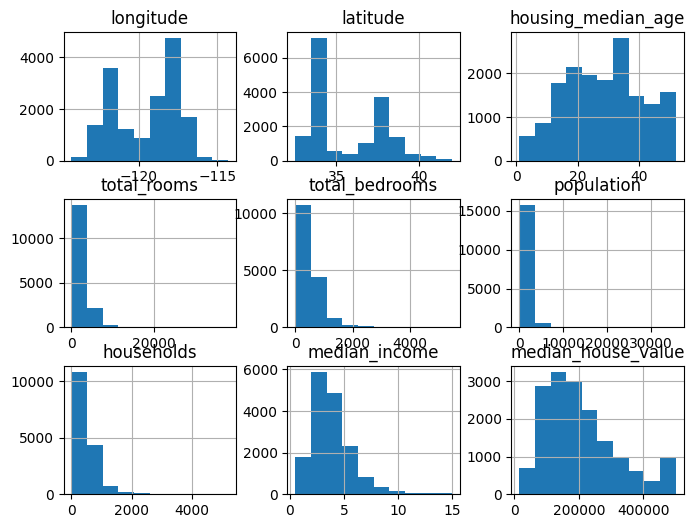

In [60]:
#visualize the data
train_data = x_train.join(y_train)
train_data.hist(figsize=(8, 6))

In [61]:
train_data['ocean_proximity'].value_counts()
#pd.get_dummies to convert ocean_proximity data into binary like true or false conditions
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)
#train_data.drop(['ocean_proximity'], axis=1, inplace=True)
train_data




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12444,-114.67,33.92,17.0,97.0,24.0,29.0,15.0,1.2656,27500.0,0,1,0,0,0
19876,-119.31,36.33,46.0,1636.0,338.0,772.0,332.0,2.4250,84900.0,0,1,0,0,0
16553,-121.24,37.82,9.0,6169.0,959.0,3378.0,945.0,5.1047,157900.0,0,1,0,0,0
8410,-118.35,33.93,33.0,2040.0,576.0,2649.0,561.0,2.3375,170600.0,1,0,0,0,0
8158,-118.12,33.81,37.0,1798.0,331.0,860.0,340.0,4.2143,228500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20438,-118.79,34.26,17.0,1986.0,249.0,761.0,241.0,7.2137,401900.0,1,0,0,0,0
16829,-122.47,37.61,34.0,4551.0,837.0,2208.0,834.0,5.4364,279300.0,0,0,0,0,1
14554,-117.14,32.96,12.0,5949.0,799.0,2936.0,781.0,6.3721,241500.0,1,0,0,0,0
8374,-118.35,33.96,26.0,2773.0,681.0,1560.0,631.0,3.1354,164300.0,1,0,0,0,0


<Axes: >

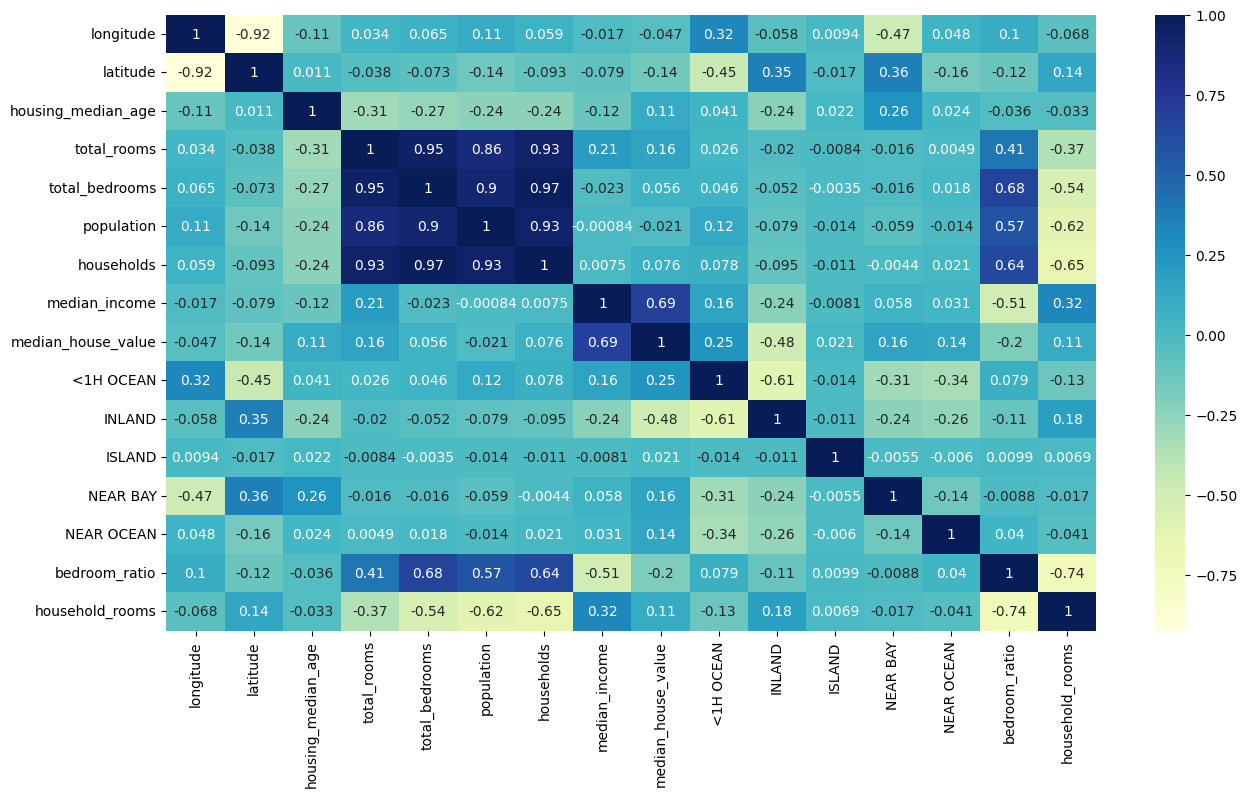

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [63]:
#data is currently skewed so we are making it more centered like a bell curve (gaussian distribution), add one so don't get undefined values
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)



<Axes: xlabel='latitude', ylabel='longitude'>

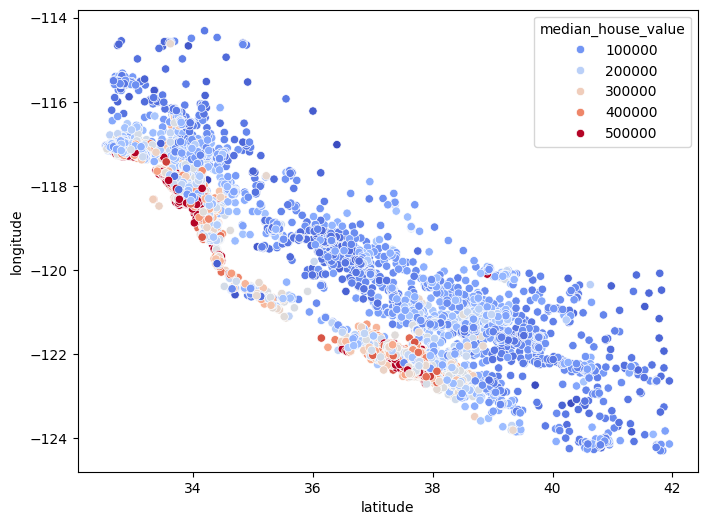

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [65]:
#feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

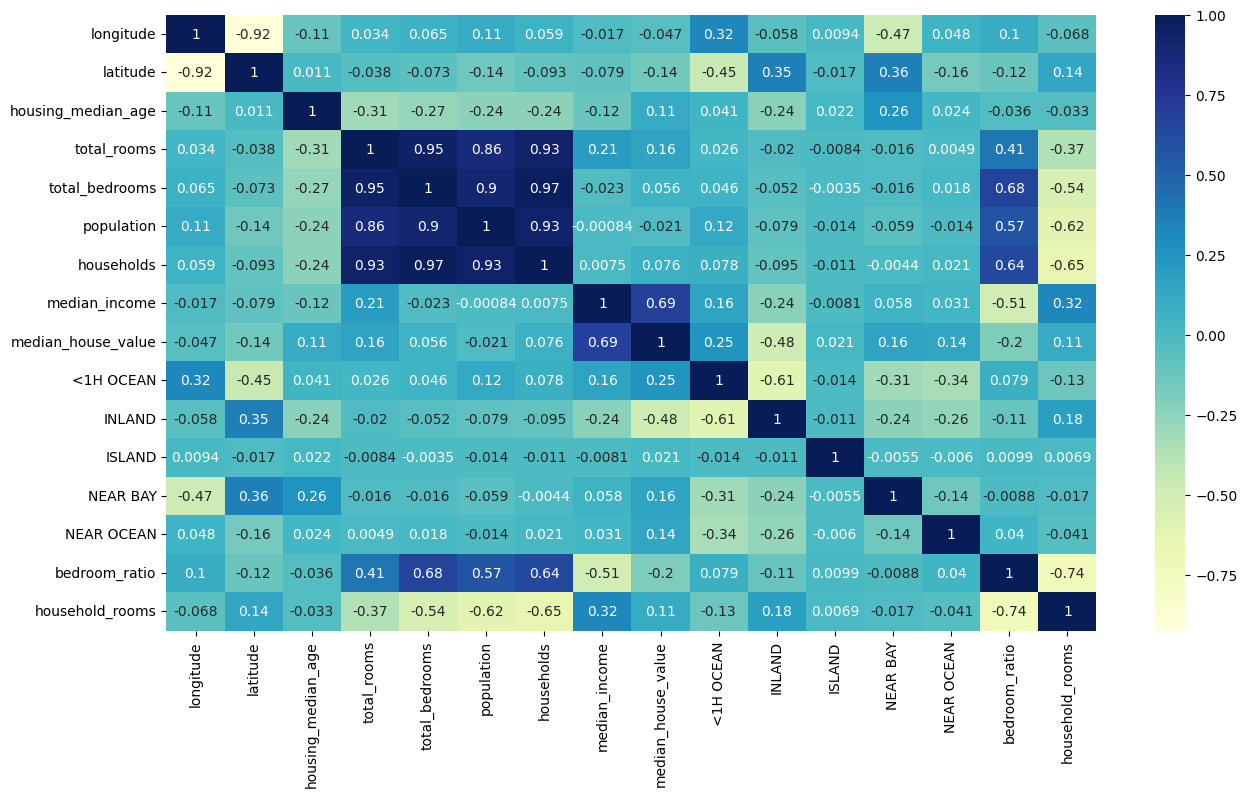

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)



reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [80]:
#implmenet same changes to test data
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)
#train_data.drop(['ocean_proximity'], axis=1, inplace=True)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [75]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9701,-121.63,36.67,34.0,7.818832,6.329721,7.801391,6.324359,2.5263,130400.0,1,0,0,0,0,0.809548,1.236304
4443,-118.21,34.09,37.0,7.508239,6.212606,7.581720,6.228511,1.9881,159200.0,1,0,0,0,0,0.827439,1.205463
18128,-122.00,37.33,30.0,8.302514,6.678342,7.489412,6.694562,5.6932,338700.0,1,0,0,0,0,0.804376,1.240188
9641,-120.84,37.07,24.0,7.327123,5.817111,6.783325,5.726848,2.2019,100000.0,0,1,0,0,0,0.793915,1.279434
19527,-120.96,37.64,41.0,7.291656,5.796058,6.513230,5.739793,2.7917,90700.0,0,1,0,0,0,0.794889,1.270369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,-121.29,38.03,7.0,7.611842,6.091310,7.387709,6.008813,2.5842,111300.0,0,1,0,0,0,0.800241,1.266780
20316,-119.16,34.17,17.0,8.985070,7.380256,8.769973,7.375882,4.1279,223900.0,0,0,0,0,1,0.821391,1.218169
16677,-120.66,35.13,41.0,7.888710,6.622736,6.846943,6.230481,1.9653,236100.0,1,0,0,0,0,0.839521,1.266148
15007,-117.02,32.76,15.0,7.094235,5.789960,6.298949,5.789960,1.0278,154200.0,1,0,0,0,0,0.816150,1.225265


In [81]:
x_test_s = scaler.transform(x_test)

In [83]:
reg.score(x_test_s, y_test) #bad score

0.6736528559492183

In [85]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)
forest.score(x_test_s, y_test)
#better score

0.8108688482512959

In [95]:
#parameter grid using grid search with cross validation
#split data into k folds
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
#results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (neg MSE): ", grid_search.best_score_)

# To access detailed results
results = grid_search.cv_results_
#print("Detailed results: ", results)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (neg MSE):  -2540894239.0524116


In [98]:
best_forest.score(x_test_s, y_test)

0.8115909560096223

Mean Squared Error: 2539927311.3079886
R-squared: 0.8119007888820275
